# Problem Statement

### Elon Musk has started his own laptop company (Tesla Laptop) in India. He wants to give tough fights to big companies like Apple, Alienware, HP etc.

### He does not know how to estimate the price of laptops his company creates. In this competitive laptop market you cannot simply assume things. 

### Musk wants to find out some relation between features of a Laptop(eg:- RAM, OS,  etc) and its selling price. But he is not so good at Data Mining. 😥

### To solve this problem he already asked his Data Engineering team (from Twitter 🐥🤭) to collect laptop data from various competitors.

### Now he needs your (i.e Data Scientist’s) help to solve the following problem. 🥰








# Sprint - 1 (Data Analysis and Mining)


## Musk’s Requirements

#### 1)Build an interface (using streamlit) for Elon Musk where he can enter the laptop features like RAM Size, RAM Type, HDD, OS, etc. and get the price prediction.

#### 2)Based on your Data Analysis and MIning skills, give recommendations to Elon Musk on how the pricing works in the laptop market.





# Sprint - 2 (ML Model Tuning)

#### Now he wants you to test the models you have created for Underfitting and Overfitting. He wants you to build a best fit model.

#### Todo - 
#### First try to check if the models you have created are a best fit or not.
#### See if applying cross validation helps improve your models performance.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('C:/Users/hrush/Downloads/laptop_details.csv')
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [3]:
df.shape

(720, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [5]:
df.isnull().sum()

Product      0
Rating     139
MRP          0
Feature      0
dtype: int64

In [6]:
df['MRP'] = df['MRP'].apply(lambda x : x.replace('₹', '').replace(',', '')).astype(int)

In [7]:
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [8]:
import re

In [9]:
regex = r'^\w+'
df['Brand']=df['Product'].apply(lambda x : re.findall(regex, x))
df['Brand']= df['Brand'].apply(lambda x : ''.join(x))


In [10]:
regex= r'^(?:AMD|Intel|M1|Apple)[\s\w]+Processor'
df['Processor Type']=df['Feature'].apply(lambda x : re.findall(regex, x))
df['Processor Type']=df['Processor Type'].apply(lambda x : ''.join(x))
df['Processor Type']=df['Processor Type'].apply(lambda x: x.replace(" Processor", ""))

In [11]:
regex= r'[\d]+[\s]bit[\s\w]+Operating System|[\(Windows)\d\s]+Operating System|[\(Chrome|Mac OS)]+Operating System'
df['Operating System']=df['Feature'].apply(lambda x : re.findall(regex, x))
df['Operating System']=df['Operating System'].apply(lambda x : ''.join(x))
df['Operating System']=df['Operating System'].apply(lambda x: x.replace(" Operating System", ""))

In [12]:
regex = r'\d+\sGB[\s\w]+RAM'
df['RAM'] = df['Feature'].apply(lambda x : re.findall(regex, x))
df.RAM = df.RAM.apply(lambda x : ''.join(x))

In [13]:
regex = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD)'
df['Storage']=df['Feature'].apply(lambda x : re.findall(regex, x))
df['Storage']=df['Storage'].apply(lambda x : ''.join(x))

In [14]:
df.head()

,Product,Rating,MRP,Feature,Brand,Processor Type,Operating System,RAM,Storage
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3,64 bit Windows 11,8 GB DDR4 RAM,256 GB SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Intel Core i3,64 bit Windows 11,8 GB DDR4 RAM,512 GB SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i3,64 bit Windows 11,8 GB DDR4 RAM,512 GB SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,AMD Ryzen 5 Hexa Core,64 bit Windows 10,8 GB DDR4 RAM,512 GB SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Intel Core i5,Windows 11,8 GB DDR4 RAM,512 GB SSD


In [15]:
df['Brand'].unique()

array(['Lenovo', 'ASUS', 'HP', 'DELL', 'RedmiBook', 'realme', 'acer',
       'MSI', 'APPLE', 'Infinix', 'SAMSUNG', 'Ultimus', 'Vaio',
       'GIGABYTE', 'Nokia', 'ALIENWARE'], dtype=object)

In [16]:
df['Processor Type'].unique()

array(['Intel Core i3', 'AMD Ryzen 5 Hexa Core', 'Intel Core i5', '',
       'AMD Ryzen 7 Quad Core', 'AMD Ryzen 5 Quad Core',
       'AMD Ryzen 9 Octa Core', 'AMD Ryzen 7 Octa Core', 'Apple M1',
       'Intel Celeron Dual Core', 'AMD Ryzen 3 Dual Core',
       'AMD Athlon Dual Core', 'AMD Ryzen 3 Quad Core', 'Apple M2',
       'Intel Celeron Quad Core', 'Intel Core i7', 'Apple M1 Pro',
       'Apple M1 Max', 'Intel Core i9', 'Intel Pentium Silver',
       'AMD Ryzen 5 Dual Core', 'Intel Pentium Quad Core',
       'AMD Dual Core', 'AMD Ryzen 3 Hexa Core'], dtype=object)

In [17]:
df[df['Processor Type']=='']


,Product,Rating,MRP,Feature,Brand,Processor Type,Operating System,RAM,Storage
6,DELL Inspiron Core i3 11th Gen - (8 GB/1 TB HD...,4.3,38990,Processor: Intel i3-1115G4 (Base- 1.70 GHz & T...,DELL,,Windows 11,8 GB DDR4 RAM,1 TB HDD256 GB SSD
8,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,4.4,46990,Stylish & Portable Thin and Light Laptop14 inc...,realme,,64 bit Windows 10,8 GB DDR4 RAM,256 GB SSD
29,realme Book (Slim) Core i3 11th Gen - (8 GB/25...,4.4,46990,Stylish & Portable Thin and Light Laptop14 inc...,realme,,64 bit Windows 10,8 GB DDR4 RAM,256 GB SSD
33,acer Aspire 7 Ryzen 5 Hexa Core AMD R5-5500U -...,4.4,47990,Free upgrade to Windows 11 when availableAMD R...,acer,,64 bit Windows 11,8 GB DDR4 RAM,512 GB SSD
53,realme Book(Slim) Intel Evo Core i5 11th Gen -...,4.4,59990,Powered by 11th Gen Intel Evo Core i5 Processo...,realme,,64 bit Windows 10,8 GB DDR4 RAM,512 GB SSD
54,acer Aspire 7 Core i5 10th Gen - (8 GB/512 GB ...,4.4,47990,Free upgrade to Windows 11 when availableIntel...,acer,,64 bit Windows 10,8 GB DDR4 RAM,512 GB SSD
69,DELL Ryzen 5 Hexa Core AMD R5-5600H - (16 GB/5...,4.6,70990,Processor: AMD Ryzen R5-5600H (3.30 GHz up to ...,DELL,,64 bit Windows 11,16 GB DDR4 RAM,512 GB SSD
83,SAMSUNG Galaxy Book Go Snapdragon 7c Gen 2 - (...,4.4,32990,Qualcomm Snapdragon 7c Gen 2 Processor4 GB LPD...,SAMSUNG,,Windows 11,4 GB LPDDR4X RAM,
94,DELL Inspiron Pentium Silver - (8 GB/256 GB SS...,4.2,30428,Processor: Intel PQC-N5030 (1.10 GHz up to 3.1...,DELL,,64 bit Windows 11,8 GB DDR4 RAM,256 GB SSD
116,realme Book(Slim) Intel Evo Core i5 11th Gen -...,4.4,59990,Powered by 11th Gen Intel Evo Core i5 Processo...,realme,,64 bit Windows 10,8 GB DDR4 RAM,512 GB SSD


In [18]:
df.iloc[6,5]='Intel i3-1115G4'
df.iloc[8,5]='Intel Core i3'
df.iloc[29,5]='Intel Core i3'
df.iloc[33,5]='AMD Ryzen 5 Hexa Core'
df.iloc[53,5]='Intel Evo Core i5'
df.iloc[54,5]='Intel Core i5'
df.iloc[69,5]='AMD Ryzen R5-5600H'
df.iloc[83,5]='Qualcomm Snapdragon 7c Gen 2'
df.iloc[94,5]='Intel PQC-N5030'
df.iloc[116,5]='Gen Intel Evo Core i5'
df.iloc[122,5]='AMD Ryzen 7 Octa Core'
df.iloc[142,5]='AMD Ryzen 3 Dual Core'
df.iloc[172,5]='Intel i3-1115G4'
df.iloc[232,5]='Intel Core i7'
df.iloc[249,5]='Intel i3-1125G4'
df.iloc[253,5]='AMD Ryzen 5-3450U'
df.iloc[259,5]='Intel Core i5'
df.iloc[349,5]='Intel Core i5-1135G7'
df.iloc[355,5]='Intel Core i3-1005G1'
df.iloc[393,5]='Intel Core i5'
df.iloc[438,5]='Intel Core i5'
df.iloc[443,5]='Intel Core i7'
df.iloc[502,5]='AMD Ryzen 5 Hexa Core'
df.iloc[508,5]='Intel Core i5 Pro'
df.iloc[593,5]='Intel i7-11800H'
df.iloc[622,5]='Intel Core i7'
df.iloc[628,5]='Intel Core i9'
df.iloc[643,5]='Intel Core i7'
df.iloc[644,5]='Intel Core i5'
df.iloc[645,5]='AMD Ryzen 5 Hexa Core'
df.iloc[688,5]='Intel Core i7'
df.iloc[689,5]='Intel Core i7'


In [19]:
len(df[df['Processor Type']==''])


0

In [20]:
df['Processor Type'].replace("Gen Intel Evo Core i5","Intel Evo Core i5", inplace=True)

In [21]:
df[['Processor','x','y','z','a']]=df['Processor Type'].str.split(" ", expand=True)
df.drop(['Processor Type','x','y','z','a'], axis=1, inplace=True)
df['Processor'].unique()

array(['Intel', 'AMD', 'Apple', 'Qualcomm'], dtype=object)

In [22]:
df['Operating System'].replace({'MMac OS':'Mac', 'OS':'Mac', 'MChrome':'Chrome',
                                '5Operating System64 bit Windows 10':'Windows 10',
                               ' Windows 1064 bit Windows 10':'Windows 10',
                               '64 bit Chrome':'Chrome'}, inplace=True)

df['Operating System']=df['Operating System'].apply(lambda x: x.replace('64 bit ', '').replace('32 bit ','').replace('64 bit ',''))
df['Operating System'].unique()

array(['Windows 11', 'Windows 10', 'Mac', 'Chrome', 'DOS'], dtype=object)

In [23]:
df['RAM']=df['RAM'].apply(lambda x: x.replace("128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM8 GB DDR4 RAM","8 GB DDR4 RAM"))
df['RAM']=df['RAM'].apply(lambda x: x.replace("Unified Memory","Unified"))
df['RAM'].unique()


array(['8 GB DDR4 RAM', '16 GB DDR4 RAM', '16 GB DDR5 RAM',
       '4 GB LPDDR4 RAM', '4 GB DDR4 RAM', '8 GB Unified RAM',
       '8 GB LPDDR4X RAM', '16 GB Unified RAM', '4 GB LPDDR4X RAM',
       '16 GB LPDDR4X RAM', '16 GB LPDDR5 RAM', '32 GB Unified RAM',
       '16 GB LPDDR4 RAM', '32 GB DDR5 RAM', '8 GB DDR5 RAM',
       '32 GB DDR4 RAM', '32 GB LPDDR4X RAM', '16 GB LPDDR3 RAM'],
      dtype=object)

In [24]:
df[['RAM Size','GB', 'RAM Type', 'RAM1']]=df['RAM'].str.split(' ', expand=True)

df.drop(['GB','RAM1','RAM'], axis=1, inplace=True)
df['RAM Size']=df['RAM Size']+"GB"
df.head()

,Product,Rating,MRP,Feature,Brand,Operating System,Storage,Processor,RAM Size,RAM Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows 11,256 GB SSD,Intel,8GB,DDR4
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows 11,512 GB SSD,Intel,8GB,DDR4
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows 11,512 GB SSD,Intel,8GB,DDR4
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows 10,512 GB SSD,AMD,8GB,DDR4
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows 11,512 GB SSD,Intel,8GB,DDR4


In [25]:
df['Storage'].unique()

array(['256 GB SSD', '512 GB SSD', '1 TB HDD256 GB SSD', '1 TB SSD',
       '256 GB HDD256 GB SSD', '', '1 TB HDD', '128 GB SSD',
       '1 TB HDD512 GB SSD', '128 GB SSD1 TB HDD128 GB SSD', '2 TB SSD'],
      dtype=object)

In [26]:
df[df['Storage']=='']

,Product,Rating,MRP,Feature,Brand,Operating System,Storage,Processor,RAM Size,RAM Type
83,SAMSUNG Galaxy Book Go Snapdragon 7c Gen 2 - (...,4.4,32990,Qualcomm Snapdragon 7c Gen 2 Processor4 GB LPD...,SAMSUNG,Windows 11,,Qualcomm,4GB,LPDDR4X
89,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/...,NaN,19490,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Lenovo,Chrome,,Intel,4GB,DDR4
96,Lenovo IdeaPad 3 CB Celeron Dual Core - (4 GB/...,NaN,19490,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,Lenovo,Chrome,,Intel,4GB,DDR4
345,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,14990,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,Chrome,,Intel,4GB,LPDDR4
509,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,24390,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,Chrome,,Intel,4GB,LPDDR4
544,ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 G...,4.5,21990,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,ASUS,Windows 11,,Intel,4GB,DDR4
559,ASUS EeeBook 12 Celeron Dual Core - (4 GB/64 G...,4.0,19990,Intel Celeron Dual Core Processor4 GB DDR4 RAM...,ASUS,Windows 11,,Intel,4GB,DDR4
632,Lenovo IdeaPad Flex 3 Chromebook Celeron Dual ...,3.6,28490,Intel Celeron Dual Core Processor4 GB LPDDR4X ...,Lenovo,Chrome,,Intel,4GB,LPDDR4X
695,ASUS Chromebook Celeron Dual Core - (4 GB/64 G...,4.1,25990,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,Chrome,,Intel,4GB,LPDDR4
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,ASUS,Chrome,,Intel,4GB,LPDDR4


In [27]:
len(df[df['Storage']==''])

10

In [28]:
df.iloc[83,6]='128GB EMMC'
df.iloc[89,6]='64GB EMMC'
df.iloc[96,6]='64GB EMMC'
df.iloc[345,6]='32GB EMMC'
df.iloc[509,6]='64GB EMMC'
df.iloc[544,6]='64GB EMMC'
df.iloc[559,6]='64GB EMMC'
df.iloc[632,6]='128GB EMMC'
df.iloc[695,6]='64GB EMMC'
df.iloc[715,6]='64GB EMMC'

In [29]:
len(df[df['Storage']==''])

0

In [30]:
df['Storage'].replace({'256 GB SSD':'256GB SSD'}, inplace=True)
df['Storage'].replace({'512 GB SSD':'512GB SSD'}, inplace=True)
df['Storage'].replace({'1 TB SSD':'1TB SSD'}, inplace=True)
df['Storage'].replace({'1 TB HDD':'1TB HDD'}, inplace=True)
df['Storage'].replace({'128 GB SSD':'128GB SSD'}, inplace=True)
df['Storage'].replace({'2 TB SSD':'2TB SSD'}, inplace=True)
df['Storage'].replace({'1 TB HDD256 GB SSD':'1TB HDD'}, inplace=True)
df['Storage'].replace({'256 GB HDD256 GB SSD':'256GB HDD'}, inplace=True)
df['Storage'].replace({'1 TB HDD512 GB SSD':'1TB HDD'}, inplace=True)
df['Storage'].replace({'128 GB SSD1 TB HDD128 GB SSD':'1TB HDD'}, inplace=True)

In [31]:
df[['Disc Size','Disc Type']]=df['Storage'].str.split(' ', expand=True)

df.drop(['Storage'], axis=1, inplace=True)
df.head()

,Product,Rating,MRP,Feature,Brand,Operating System,Processor,RAM Size,RAM Type,Disc Size,Disc Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows 11,Intel,8GB,DDR4,256GB,SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows 11,Intel,8GB,DDR4,512GB,SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows 11,Intel,8GB,DDR4,512GB,SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows 10,AMD,8GB,DDR4,512GB,SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows 11,Intel,8GB,DDR4,512GB,SSD


In [32]:
df['Rating'].fillna(df['Rating'].median(), inplace=True)
df.Rating.isna().sum()

0

# cleaned Data 

In [33]:
df.head()

,Product,Rating,MRP,Feature,Brand,Operating System,Processor,RAM Size,RAM Type,Disc Size,Disc Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows 11,Intel,8GB,DDR4,256GB,SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows 11,Intel,8GB,DDR4,512GB,SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows 11,Intel,8GB,DDR4,512GB,SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows 10,AMD,8GB,DDR4,512GB,SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows 11,Intel,8GB,DDR4,512GB,SSD


# Exploratory Data Analysis

### Analysis of MRP column

In [34]:
print("Maximum", df['MRP'].max())
print("Minimum", df['MRP'].min())
print("Mean", df['MRP'].mean())
print("Median", df['MRP'].median())
print("Standard Deviation", df['MRP'].std())

Maximum 434830
Minimum 14990
Mean 81605.8375
Median 59990.0
Standard Deviation 61552.95510244973


## Outlier Detection

<AxesSubplot:ylabel='Frequency'>

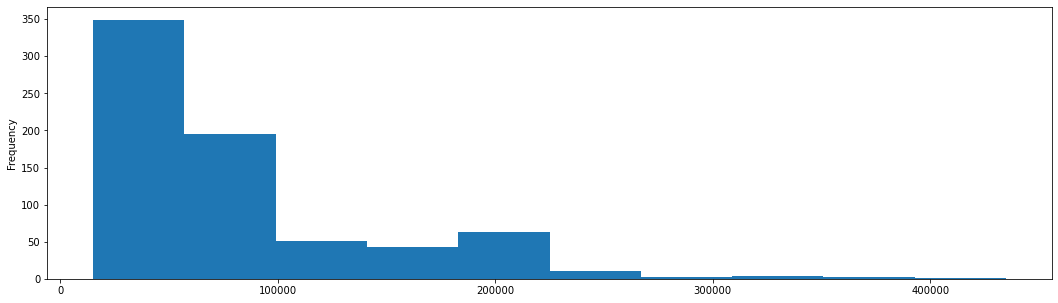

In [35]:
df['MRP'].plot(kind='hist', figsize=(18,5))

<AxesSubplot:>

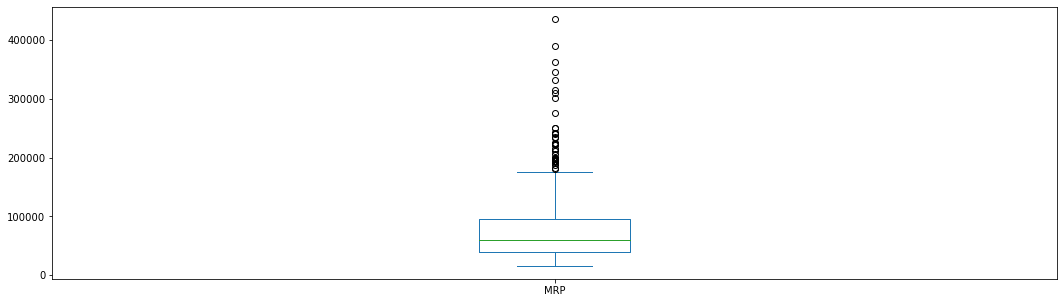

In [36]:
df['MRP'].plot(kind='box', figsize=(18,5))

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Relationship of Brand and MRP

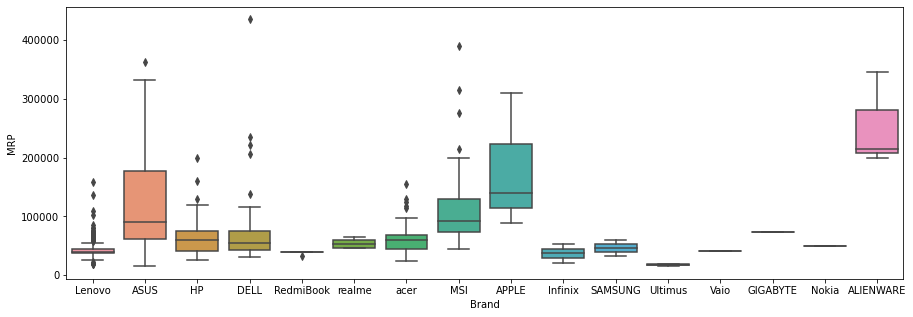

In [38]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='Brand', y ='MRP', data=df);

### ALIENWARE laptops are ranges approximetely from 2 Lakh to 3.5 Lakh, these are costiest laptops

# Relation between Processor Type and MRP

<AxesSubplot:xlabel='Processor', ylabel='MRP'>

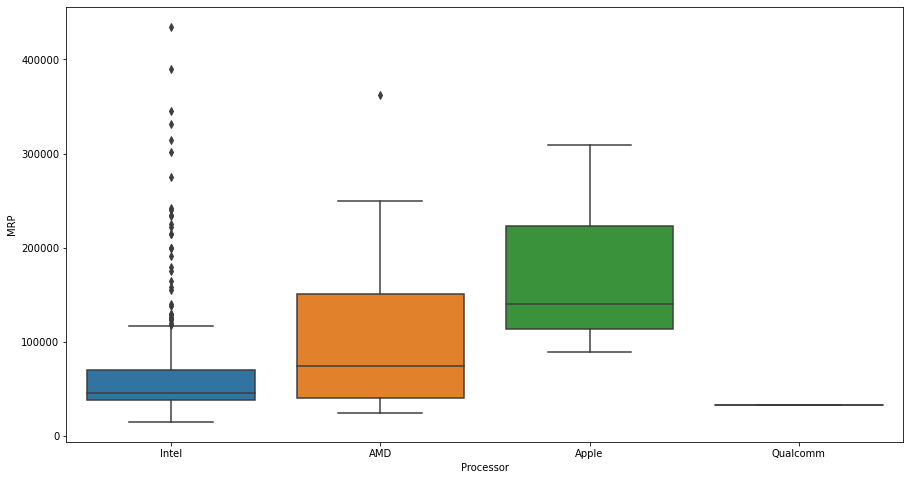

In [39]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Processor', y ='MRP', data=df)

# Relation between Operating system and MRP

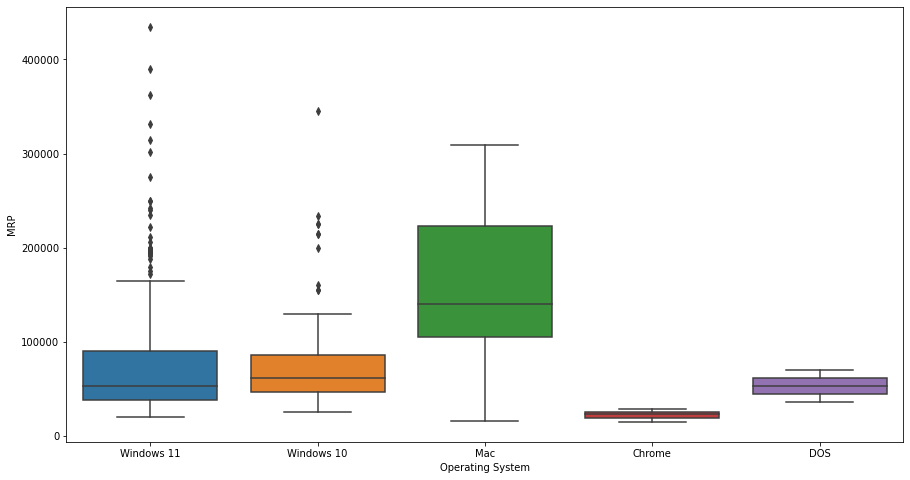

In [40]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Operating System', y ='MRP', data=df);

### windows 11 mac have higher prices

# Relation between RAM type and MRP

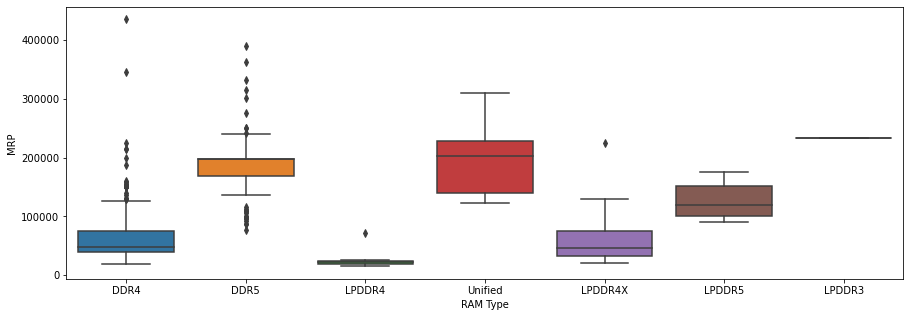

In [41]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='RAM Type', y ='MRP', data=df);

# Relation between Disc type and MRP

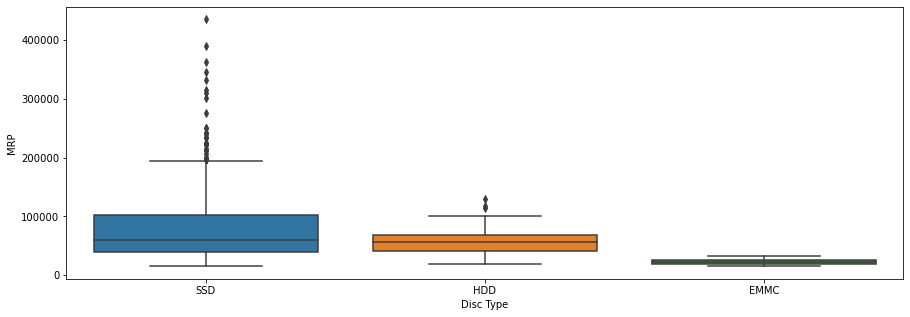

In [43]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='Disc Type', y ='MRP', data=df);

# machine learning Data

In [44]:
data=df[['Brand','Processor','Operating System','RAM Type','RAM Size','Disc Type','Disc Size','MRP']]
data.to_csv('laptop_price.csv', index=False)
data.head()

,Brand,Processor,Operating System,RAM Type,RAM Size,Disc Type,Disc Size,MRP
0,Lenovo,Intel,Windows 11,DDR4,8GB,SSD,256GB,36990
1,Lenovo,Intel,Windows 11,DDR4,8GB,SSD,512GB,39990
2,ASUS,Intel,Windows 11,DDR4,8GB,SSD,512GB,32990
3,HP,AMD,Windows 10,DDR4,8GB,SSD,512GB,49990
4,ASUS,Intel,Windows 11,DDR4,8GB,SSD,512GB,49990


# Summay of Analysis 

### ALIENWARE is ranges approximetely from 2 Lakh to 3.5 Lakh,which is high price compared to remaining laptops.
### Average price for ALIENWARE, APPLE, ASUS,MSI laptops brand is high.
### Average price is high for Mac Operating System laptops.
### LPDDR3 RAM type laptops has highest average price.
### SSD Disc type laptops has highest average price.
### Higher the RAM size higher the Price of laptop.
### Higher the Disc size higher the Price of laptop.
### 2TB Disc size laptops have high price.